Questions:
1. pourquoi le nombre de couches augmente ? 32 > 64 comment décider ? 



In [ ]:
from google.colab import drive

import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import load_model, Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.backend import clear_session
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import os
import numpy as np

import cv2

plt.style.use('ggplot')
#!pip install keras-hypetune

In [ ]:
def plot_history(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  x = range(1, len(acc) + 1)

  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(x, acc, 'b', label='Training acc')
  plt.plot(x, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(x, loss, 'b', label='Training loss')
  plt.plot(x, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

# Creation de modelo,
def create_model(num_filters,num_filters1, kernel_size, dropout, optimizer):
  model = Sequential()
  model.add(Conv2D(num_filters, kernel_size, input_shape=(150, 150, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(num_filters1, kernel_size))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(num_filters1, kernel_size))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors
  model.add(Dense(64))
  model.add(Activation('relu'))
  model.add(Dropout(dropout))
  model.add(Dense(3))
  model.add(Activation('softmax'))
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
  metrics=['accuracy'])
  return model
  


In [ ]:
# A mettre au début d'un colab pour enregistrer data sur le MyDrive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [ ]:
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
# dense 
model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])

N.B: optimier = 'rmsprop: 
Maintenir une moyenne mobile (actualisée) du carré des dégradés Divisez le gradient par la racine de cette moyenne

Data pre­processing and data augmentation
https://keras.io/api/preprocessing/image/

https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/


In [ ]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [ ]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


In [ ]:




drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img = load_img('drive/MyDrive/sample_data/train/cats/cat453a.jpg') # this is a PIL image
x = img_to_array(img) # this is a Numpy array with shape (3, 150, 150)
print(x.shape)
x = x.reshape((1,) + x.shape) # this is a Numpy array with shape (1, 3, 150, 150)
print(x.shape)
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='drive/MyDrive/sample_data/preview', save_prefix='cat', save_format='jpeg'):
  i += 1
  if i > 20:
    break # otherwise the generator would loop indefinitely

(242, 242, 3)
(1, 242, 242, 3)


In [ ]:
model.compile(loss='binary_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])

In [ ]:
batch_size = 16
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)



In [ ]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
'drive/MyDrive/sample_data/train', # this is the target directory
classes = ["cats","dogs"],
target_size=(150, 150), # all images will be resized to 150x150
batch_size=batch_size,
class_mode='binary')

Found 198 images belonging to 2 classes.


In [ ]:
# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
'drive/MyDrive/sample_data/validation',
classes = ["cats","dogs"],
target_size=(150, 150),
batch_size=batch_size,
class_mode='binary')

Found 30 images belonging to 2 classes.


In [ ]:



clear_session()

In [ ]:
#history = model.fit_generator(
train_generator,
#steps_per_epoch= 2 , # // batch_size,
epochs=10,
validation_data=validation_generator,
#validation_steps= 2 
) # // batch_size)
model.save_weights('drive/MyDrive/sample_data/first_try.h5') # always save your weights after training or during training

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
31/31 [==============================] - 225s 6s/step - loss: 0.9269 - accuracy: 0.6891 - val_loss: 0.6462 - val_accuracy: 0.6000
Epoch 2/10
31/31 [==============================] - 4s 124ms/step - loss: 0.4883 - accuracy: 0.8094 - val_loss: 0.6653 - val_accuracy: 0.6000
Epoch 3/10
31/31 [==============================] - 4s 127ms/step - loss: 0.4599 - accuracy: 0.8098 - val_loss: 0.5371 - val_accuracy: 0.6333
Epoch 4/10
31/31 [==============================] - 4s 126ms/step - loss: 0.3924 - accuracy: 0.8201 - val_loss: 0.4654 - val_accuracy: 0.7333
Epoch 5/10
31/31 [==============================] - 4s 123ms/step - loss: 0.2630 - accuracy: 0.9064 - val_loss: 0.4589 - val_accuracy: 0.7667
Epoch 6/10
31/31 [==============================] - 4s 125ms/step - loss: 0.2940 - accuracy: 0.8774 - val_loss: 0.3320 - val_accuracy: 0.8667
Epoch 7/10
31/31 [==============================] - 4s 124ms/step - loss: 0.2394 - accuracy: 0.9057 - val_loss: 0.3634 - val_accuracy: 0.7667
Epoch 8

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


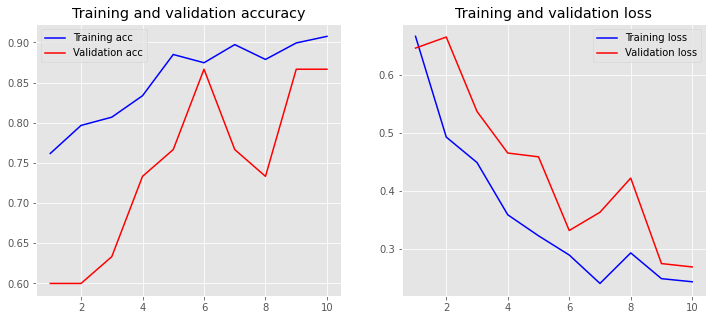

In [ ]:
plot_history(history)

In [ ]:

#current_path = os.path.join(src, animal)
list_bear=[] 
for file in os.listdir("/content/gdrive/MyDrive/sample_data/train/dogs"):
    list_bear.append(file)
print (len(list_bear) ) 

FileNotFoundError: ignored

In [ ]:
!pwd
!cd sample_data/train
!ls -all



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls
!ls /content/gdrive/MyDrive/
!cp -a  sample_data /content/gdrive/MyDrive

In [ ]:
gdrive/MyDrive/sample_data

NameError: ignored

In [ ]:






#model = Sequential()

#model =load_model('first_try.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('/content/gdrive/MyDrive/sample_data/validation/dogs/dog000757a.jpg')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img)
print(classes)

NameError: ignored

In [ ]:

validation_generator.class_indices

{'cats': 0, 'dogs': 1}

pip install opencv-python

In [ ]:
# Model multiclasses

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])



In [ ]:
batch_size = 16
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

In [ ]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
'drive/MyDrive/sample_data/train', # this is the target directory
classes = ["cats","dogs","rabbits"],
target_size=(150, 150), # all images will be resized to 150x150
batch_size=batch_size)
#,class_mode='binary')

Found 278 images belonging to 3 classes.


In [ ]:

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
'drive/MyDrive/sample_data/validation',
classes = ["cats","dogs","rabbits"],
target_size=(150, 150),
batch_size=batch_size)
#,class_mode='binary')

Found 50 images belonging to 3 classes.


In [ ]:
history = model.fit_generator(
train_generator,
#steps_per_epoch= 2 , # // batch_size,
epochs=25,
validation_data=validation_generator,
#validation_steps= 2 
) # // batch_size)
model.save_weights('drive/MyDrive/sample_data/first_try.h5') # always save your weights after training or during training

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25


KeyboardInterrupt: ignored

In [ ]:
plot_history(history)

In [ ]:
validation_generator.class_indices

{'cats': 0, 'dogs': 1, 'rabbits': 2}

In [ ]:
#img = load_img('drive/MyDrive/sample_data/train/cats/cat453a.jpg') # this is a PIL image
#x = img_to_array(img) # this is a Numpy array with shape (3, 150, 150)
#print(x.shape)
#x = x.reshape((1,) + x.shape) # this is a Numpy array with shape (1, 3, 150, 150)
#print(x.shape)


img = cv2.imread('drive/MyDrive/sample_data/ImageTest/nounou2.jpg')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img)
print(classes)



#################
### Random Search
#################

In [ ]:
batch_size = 16
# this is the augmentation configuration we will use for training
#train_datagen = ImageDataGenerator("rescale=1./255,
#shear_range=0.2,
#zoom_range=0.2,
#horizontal_flip=True)


datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

NameError: ignored

In [ ]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
'drive/MyDrive/sample_data/train', # this is the target directory
classes = ["cats","dogs","rabbits"],
target_size=(150, 150), # all images will be resized to 150x150
batch_size=batch_size)
#,class_mode='binary')

Found 278 images belonging to 3 classes.


In [ ]:
train_generator.samples

278

In [ ]:

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
'drive/MyDrive/sample_data/validation',
classes = ["cats","dogs","rabbits"],
target_size=(150, 150),
batch_size=batch_size)
#,class_mode='binary')

Found 50 images belonging to 3 classes.


In [ ]:
train_generator.class_indices
validation_generator.class_indices

{'cats': 0, 'dogs': 1, 'rabbits': 2}

In [ ]:
#X_train, y_train = next(train_generator)
#X_test, y_test = next(validation_generator)

# ajoutée par Bassem
X_train, y_train = next(iter(train_generator))
X_test, y_test = next(iter(validation_generator))

In [ ]:
print(X_train.shape)
print(y_train.shape)

NameError: ignored

In [ ]:
param_grid = dict(num_filters=[16,32,64],
                  num_filters1= [64], 
                  kernel_size=[(3, 3)],
                  dropout = [0.3, 0.5],
                  optimizer =['RMSprop','Adam']
                  
                 )

In [ ]:

clear_session()
epochs = 25

model = KerasClassifier(build_fn=create_model,
                            epochs=epochs, batch_size=16,
                            verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                          cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, y_train)

# Evaluate testing set
test_accuracy = grid.score(X_test,y_test)
print('accuracy_test = ',test_accuracy)

print('best socre = ', grid_result.best_score_)
print('best param = ',grid_result.best_params_)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   20.8s finished


accuracy_test =  0.5
best socre =  0.75
best param =  {'optimizer': 'Adam', 'num_filters1': 64, 'num_filters': 32, 'kernel_size': (3, 3), 'dropout': 0.3}


In [ ]:
filenames = validation_generator.filenames
nb_samples = len(filenames)
nb_samples

50

In [ ]:
model1 = create_model(optimizer= 'Adam', num_filters1= 64, num_filters= 32, kernel_size = (3, 3), dropout = 0.3)


In [ ]:
#clear_session()
history = model1.fit_generator(
train_generator,
steps_per_epoch= train_generator.samples// batch_size,
epochs=20,
validation_data=validation_generator,
#validation_steps= 2 
) # // batch_size)
#model.save_weights('drive/MyDrive/sample_data/first_try.h5') # always save your weights after training or during training

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
17/17 [==============================] - 64s 4s/step - loss: 1.1332 - accuracy: 0.3441 - val_loss: 1.0665 - val_accuracy: 0.3800
Epoch 2/20
17/17 [==============================] - 2s 121ms/step - loss: 1.0632 - accuracy: 0.4896 - val_loss: 1.0860 - val_accuracy: 0.3800
Epoch 3/20
17/17 [==============================] - 2s 121ms/step - loss: 1.0229 - accuracy: 0.4930 - val_loss: 1.0684 - val_accuracy: 0.4000
Epoch 4/20
17/17 [==============================] - 2s 126ms/step - loss: 0.9817 - accuracy: 0.5042 - val_loss: 0.9653 - val_accuracy: 0.5200
Epoch 5/20
17/17 [==============================] - 2s 125ms/step - loss: 0.8850 - accuracy: 0.6199 - val_loss: 1.3372 - val_accuracy: 0.3800
Epoch 6/20
17/17 [==============================] - 2s 125ms/step - loss: 0.8847 - accuracy: 0.6084 - val_loss: 1.0058 - val_accuracy: 0.4600
Epoch 7/20
17/17 [==============================] - 2s 120ms/step - loss: 0.8325 - accuracy: 0.6437 - val_loss: 0.9822 - val_accuracy: 0.5000
Epoch 8/

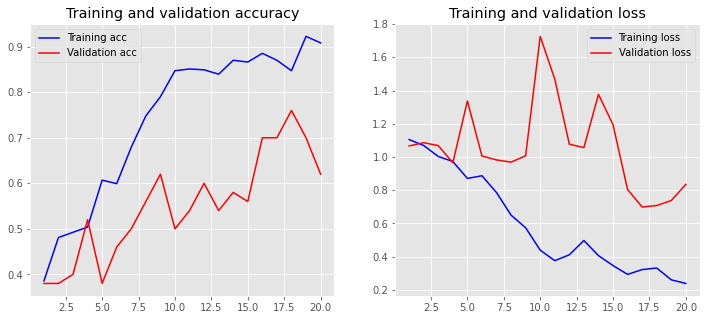

In [ ]:
plot_history(history)

In [ ]:
# https://gist.github.com/RyanAkilos/3808c17f79e77c4117de35aa68447045
    


#Confution Matrix and Classification Report
Y_pred = model1.predict_generator(validation_generator, nb_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['cat', 'dog', 'rabbit']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[3 7 2]
 [9 3 6]
 [9 7 4]]
Classification Report
              precision    recall  f1-score   support

         cat       0.14      0.25      0.18        12
         dog       0.18      0.17      0.17        18
      rabbit       0.33      0.20      0.25        20

    accuracy                           0.20        50
   macro avg       0.22      0.21      0.20        50
weighted avg       0.23      0.20      0.21        50



In [ ]:

def removeHidden (current_path): 

  list_animal=[] 
  for file in os.listdir(current_path):
    if file[0] != ".":
      list_animal.append(file)
  return list_animal

removeHidden ("drive/MyDrive/sample_data/train")

In [ ]:
#! ls gdrive/MyDrive/sample_data/train/rabbits -all

In [ ]:
!pwd
! cd content 
! ls

/content
/bin/bash: line 0: cd: content: No such file or directory
drive  gdrive  sample_data


In [ ]:
# effacer des fichiers
#! pwd
#! rm drive/MyDrive/sample_data/preview/*.jpeg




/content


In [ ]:
#current_path = os.path.join(src, animal)
list_bear=[] 
for file in os.listdir("drive/MyDrive/sample_data/train/rabbits"):
    list_bear.append(file)
print (len(list_bear) ) 

80


############################
#### GirdSearch
############################

In [ ]:
param_grid = dict(num_filters=[16,32,64],
                  num_filters1= [64], 
                  kernel_size=[(3, 3)],
                  dropout = [0.3, 0.5],
                  optimizer =['RMSprop','Adam']
                  
                 )

In [ ]:
#clear_session()
epochs = 25

model = KerasClassifier(build_fn=create_model,
                            epochs=epochs, batch_size=16,
                            verbose=False)
grid = GridSearchCV(estimator=model, param_grid=param_grid,
                          cv=4, verbose=1)
grid_result = grid.fit(X_train, y_train)

# Evaluate testing set
test_accuracy = grid.score(X_test,y_test)
print('accuracy_test = ',test_accuracy)

print('best socre = ', grid_result.best_score_)
print('best param = ',grid_result.best_params_)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.2min finished


accuracy_test =  0.375
best socre =  0.625
best param =  {'dropout': 0.3, 'kernel_size': (3, 3), 'num_filters': 32, 'num_filters1': 64, 'optimizer': 'Adam'}


In [ ]:
Paramters of the best model1
model1 = create_model(optimizer= 'Adam', num_filters1= 64, num_filters= 32, kernel_size = (3, 3), dropout = 0.3)


######################
#Pytoch
#####################

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

%matplotlib inline